## **Arc Length**
---

Packages used: 
<span style="color:yellow; background-color:green">QuadGk, Plots, ForwardDiff</span>

In [4]:
using QuadGK, Plots, ForwardDiff

>### Type 1
- **Goal**: Find the arclength of $f(x) = x^2$ from a to b  
- **Arc length integrand**: $A(x) = \sqrt{1+(\frac{df(x)}{dx})^2}$  
- **Compute**: $\int_a^b A(x)\,dx$

In [ ]:
# Define curve function
f(x) = x^2

# Define function derivative      
df(x) = ForwardDiff.derivative(f,x)

# Define the integrand for arc length
function arc_length_integrand(x)
    return sqrt(1+df(x)^2)
end

# Compute the arc length using QuadGK
a = 0.0
b = 1.0
integral, = quadgk(arc_length_integrand, a, b)

println("The arc length of the curve from x=a to x=b: ", integral)

The arc length of the curve from x=a to x=b: 1.4789428575446002


>### Type 2
- **Goal**: From $0 \le t \le 4$, find the arclength of 
$$
\begin{aligned}
x(t) &= \pi \cdot \frac{\cos\left( \frac{2\pi t}{4} \right)}{1 + \sin^2\left( \frac{2\pi t}{4} \right)} \\
y(t) &= \pi \cdot \frac{\sin\left( \frac{2\pi t}{4} \right) \cdot \cos\left( \frac{2\pi t}{4} \right)}{1 + \sin^2\left( \frac{2\pi t}{4} \right)}
\end{aligned}
$$

- **Arc length integrand**: $A(t) = \sqrt{(\frac{dx(t)}{dt})^2+(\frac{dy(t)}{dt})^2}$  
- **Compute**: $\int_a^b A(t)\,dt$

In [6]:
# Define time functions
a = pi
T = 4
x_position(t) = a * cos(t * 2 * pi / T) / (1 + sin(t * 2 * pi / T)^2)
y_position(t) = a * sin(t * 2 * pi / T) * cos(t * 2 * pi / T) / (1 + sin(t * 2 * pi / T)^2)

# Define derivative functions
dx_dt(t) = ForwardDiff.derivative(x_position, t)
dy_dt(t) = ForwardDiff.derivative(y_position, t)

# Define integrand function
function arc_length_integrand(t)
    return sqrt(dx_dt(t)^2+dy_dt(t)^2)
end

integral = quadgk(arc_length_integrand, 0, 4)
println("The arc length of the curve from t=0 to t=4: ", integral)

The arc length of the curve from t=0 to t=4: (16.474873499707456, 1.5850782464355007e-7)


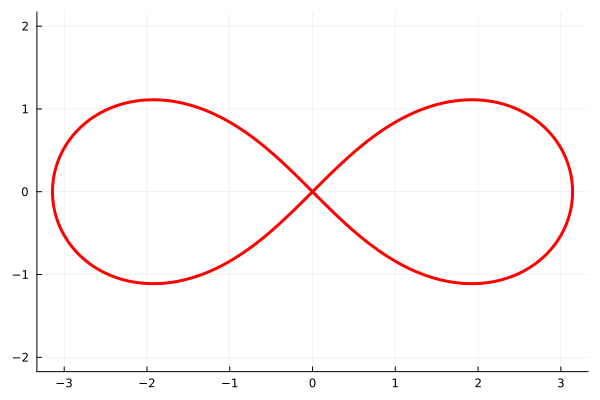

In [7]:
# Plotting
dt = 0.01
t = collect(0:dt:4)
xvalues = x_position.(t)
yvalues = y_position.(t)

p1 = plot(xvalues, yvalues, lw=3, color=:red, aspect_ratio = 1, gudefont = 15, label=false)
display(p1)